# Simple Linear Regression

In [2]:
#imports and setup
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision', 2) #number precision for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) #get rid of scientific notation
plt.style.use('seaborn') #pretty matplotlib plots

In [6]:
#Load data
boston = pd.read_csv('/Desktop/Data-Analysis/data/Boston.csv', index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


# Using scikit-learn

In [7]:
from sklearn import linear_model

#ols model with intercept
ols_sl = linear_model.LinearRegression(fit_intercept = True)

#fitted ols model (.values.reshape(-1, 1) is required for single predictor?)
x_train = boston['lstat'].values.reshape(-1, 1)
y_true = boston['medv']
ols_sl.fit(x_train, y_true)

#summary
ols_sl.intercept_, ols_sl.coef_

(34.55384087938311, array([-0.95004935]))

In [8]:
#metrics
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
y_pred = ols_sl.predict(boston['lstat'].values.reshape(-1, 1))

ols_sl_summary = {'R2' : r2_score(y_true, y_pred),
                 'Ex. Var' : explained_variance_score(y_true, y_pred),
                 'MSE' : mean_squared_error(y_true, y_pred)}

for k, v in ols_sl_summary.items():
    print(k, ':', v)

R2 : 0.5441462975864799
Ex. Var : 0.5441462975864798
MSE : 38.48296722989414


In [10]:
#out-of-sample predictions
ols_sl.predict(np.array([5, 10, 15]).reshape(-1, 1))

array([29.80359411, 25.05334734, 20.30310057])

# Using statsmodels

In [12]:
import statsmodels.api as sm

#predictor & dependent var
x_train = boston['lstat']
y_true = boston['medv']

#ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

#fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

#robust SE
#ols_sm_robust = sm.RLM(boston['medv'], X, M=sm.robust.norms.LeastSquares())
#ols_sm_robust.fit(cov='H2').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           5.08e-88
Time:                        20:02:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#out-of-sample predictions
ols_sm_results.predict(sm.add_constant([5,10,15]))

array([29.80359411, 25.05334734, 20.30310057])

<AxesSubplot:xlabel='lstat', ylabel='medv'>

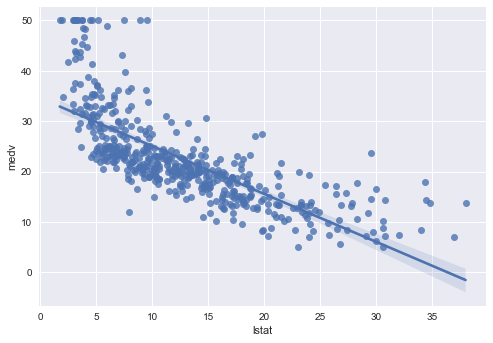

In [14]:
sns.regplot(x='lstat', y='medv', data=boston)